In [165]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
import warnings
#filter warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir('../DATA'))

['amzn_stock.pdf', 'model.json', 'AirPassengers.csv', 'transfusion.data', 'imdb_labelled_fixed.txt', 'ncc-1701-D.txt', 'P12-ListOfOrders.csv', 'CNN_test.csv', 'winequality_merged.csv', 'eshop.db.sqlite', 'Employee-attrition.csv', 'Iris.xls', 'transfusion.csv', 'Sacramento_transactions.csv', 'corpus.txt', 'test.csv', 'breast-cancer-wisconsin-data-old.csv', 'amazon_cells_labelled.txt', 'housing.names', 'london2018.csv', 'Meteorite_Landings.csv', 'kidney_disease.csv', 'P12-OrderBreakdown.csv', 'housing-data.csv', 'breast-cancer-wisconsin-data.csv', 'titanic_test.csv', 'wdbc-data.csv', 'MFG10YearTerminationData.csv', 'dummyData.json', 'housing.data', 'rock.csv', 'model.h5', 'SFPD_Incidents-Current_Year_2015.csv', 'train.csv', 'bikeshare.csv', 'diabetes.csv', 'yelp_labelled.txt', 'Family_Income_and_Expenditure.csv', 'sentiments.csv', 'transfusion.names', 'sample_form.JPG', 'breast-cancer-wisconsin.data', 'CNN_train.csv', 'imdb_labelled.txt', 'ais.csv', 'sample_submission.csv', 'titanic_trai

### Loading the data

In [166]:
#file location
train_file = '../DATA/CNN_train.csv'
test_file = '../DATA/CNN_test.csv'

#create train and test data frames
train_df = pd.read_csv(train_file)

test_df = pd.read_csv(test_file)

In [167]:
#check consistency
print(f'Train observations: {train_df.shape[0]}')
print(f'Train features: {train_df.shape[1]}\n')
print(f'Test observations: {test_df.shape[0]}')
print(f'Test features: {test_df.shape[1]}')

Train observations: 42000
Train features: 785

Test observations: 28000
Test features: 784


In [168]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
print(f'Train Dataframe:\n')
train_df.head()

Train Dataframe:



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
print(f'Test Dataframe:\n')
test_df.head()

Test Dataframe:



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
#create a y_train variable for labels
Y_train = train_df['label']
#create dataframe without label column
X_train = train_df.drop(labels = 'label', axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

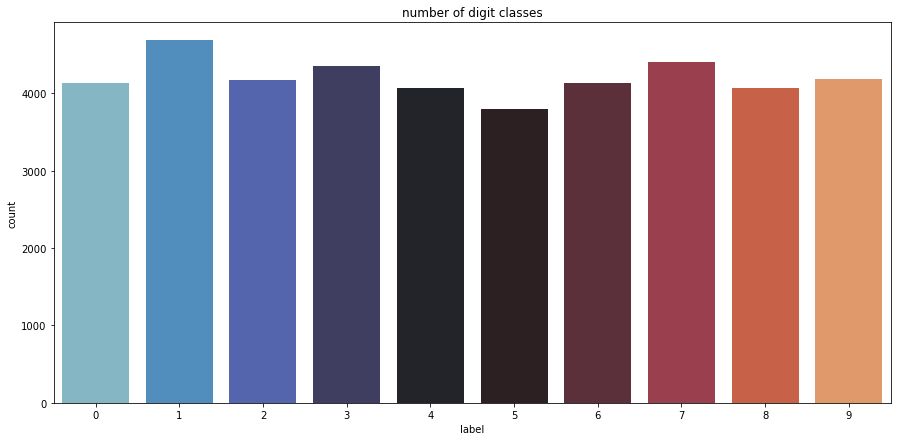

In [172]:
#visualize number of digital classes
plt.figure(figsize = (15,7))
g = sns.countplot(Y_train, palette = 'icefire')
plt.title("number of digit classes")
Y_train.value_counts()

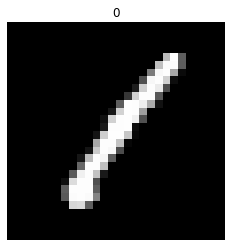

In [173]:
#plot sample 0
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(X_train.iloc[0,0])
plt.axis("off")
plt.show()

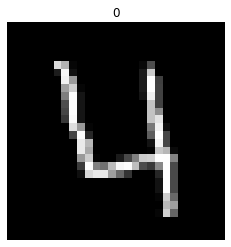

In [174]:
# plot sample 3
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(X_train.iloc[3,0])
plt.axis("off")
plt.show()

### Normalization, reshape and label encoding

In [175]:
#Normalizing the data
X_train = X_train / 255.0
X_test = test_df / 255.0

#View shape of data
print(f'Train observations: {X_train.shape[0]}')
print(f'Train features: {X_train.shape[1]}\n')
print(f'Test observations: {X_test.shape[0]}')
print(f'Test features: {X_test.shape[1]}')

Train observations: 42000
Train features: 784

Test observations: 28000
Test features: 784


In [176]:
#Reshape the data
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28, 1)

print(X_train.shape)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [177]:
#Label Encoding
from keras.utils.np_utils import to_categorical #One-hot-encoding
#Convert Y_train with one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = len(Y_train.unique()))

### Train Test Split

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = .1, random_state = 101)

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (37800, 28, 28, 1)
X_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


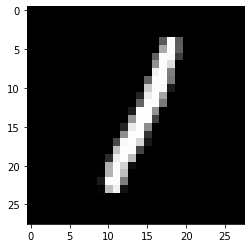

In [179]:
#sample of image from train set
plt.imshow(X_train[2][:,:,0], cmap = 'gray')
plt.show()

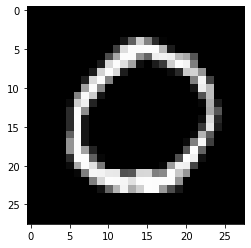

In [180]:
#sample of image from test set
plt.imshow(X_test[2][:,:,0], cmap = 'gray')
plt.show()

### Create a model with Keras

In [183]:
#Libraries import
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [186]:
model = Sequential()

#Layer 1
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer 2
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

#### Optimizer definition

In [187]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

#### Compiling the model

In [194]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [190]:
epochs = 10
batch_size = 250

### Fitting the model

In [209]:
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 25s 657us/step - loss: 0.0601 - accuracy: 0.9811 - val_loss: 0.0316 - val_accuracy: 0.9898
Epoch 2/10
37800/37800 [==============================] - 26s 695us/step - loss: 0.0599 - accuracy: 0.9807 - val_loss: 0.0280 - val_accuracy: 0.9919
Epoch 3/10
37800/37800 [==============================] - 27s 708us/step - loss: 0.0599 - accuracy: 0.9810 - val_loss: 0.0323 - val_accuracy: 0.9898
Epoch 4/10
37800/37800 [==============================] - 36s 942us/step - loss: 0.0556 - accuracy: 0.9820 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 5/10
37800/37800 [==============================] - 35s 932us/step - loss: 0.0541 - accuracy: 0.9825 - val_loss: 0.0297 - val_accuracy: 0.9907
Epoch 6/10
37800/37800 [==============================] - 36s 950us/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 7/10
37800/37800 [==============================] -

### Evaluating the model

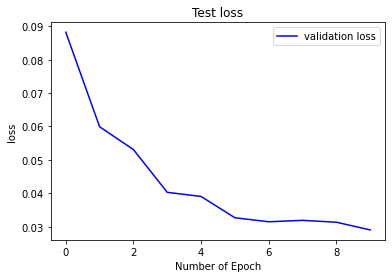

In [205]:
plt.plot(history.history['val_loss'], color = 'b', label = 'validation loss')
plt.title('Test loss')
plt.xlabel('Number of Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

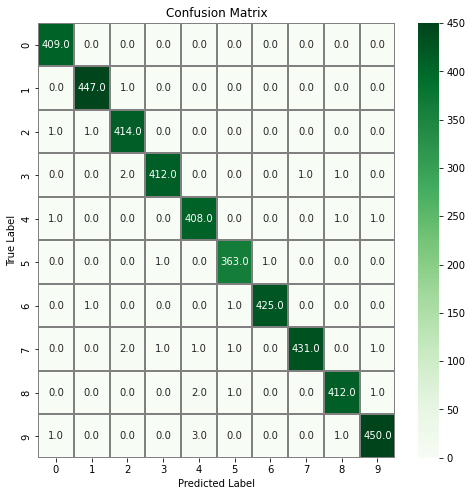

In [213]:
#confusion matrix
#Predict a value from our validation set
y_pred = model.predict(X_test)

#Convert prediction classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)

#Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis = 1)

confusion_mat = confusion_matrix(y_true, y_pred_classes)

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mat, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()